## 4.7 강화학습(Reinforcement Learning)

### 강화 학습 개요
* Reinforcement Learing
* 1950년 시작, 게임과 기계 제어 분야에서 발전
* 2013 딥 마인드 연구
    * Atrari 벽돌깨기 게임
        * https://youtu.be/TmPfTpjtdgg
    * 사전에 게임 규칙에 대한 정보 없이 훈련
    * 사람을 능가하는 결과
    * 2014년 구글 인수, 5억 달러
    
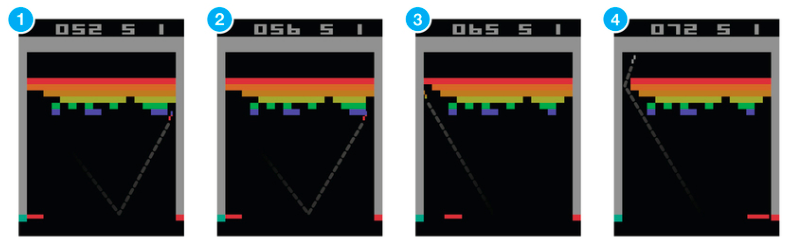

### 강화 학습을 이용한 게임
* 벽돌 깨기 이외의 대부분의 게임
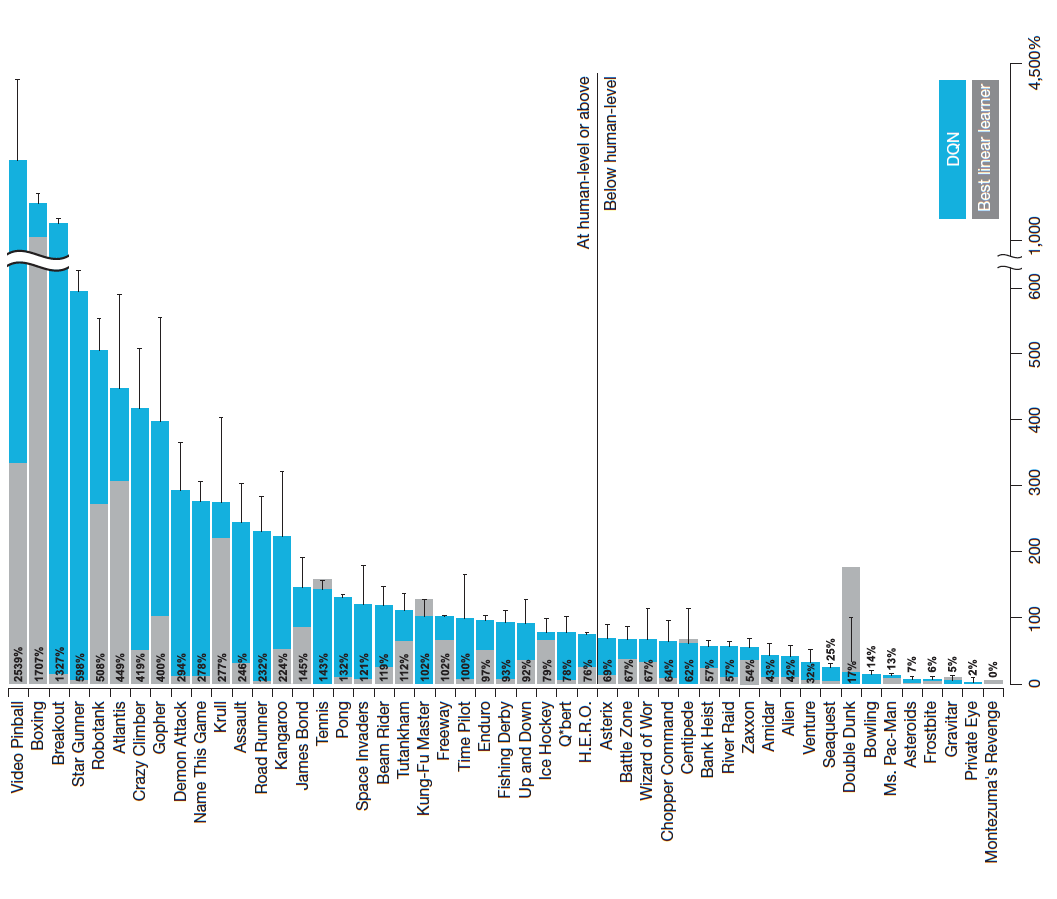

### 강화 학습, 인공 지능의 중심에 서다
* 2016년 이세돌 VS 알파고
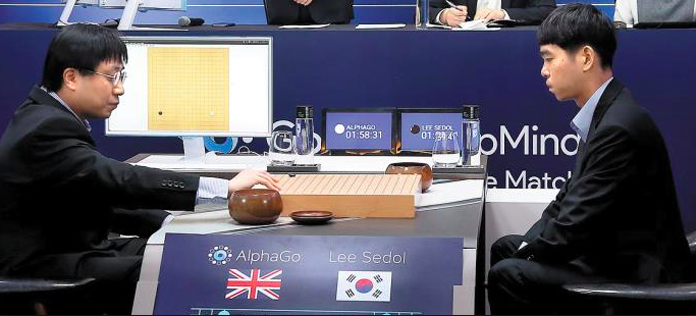

### 강화학습 응용 분야
* 로보틱스
* 사업 운영
    * 재고 관리
    * 자원 배치
* 경제
    * 투자 결정
    * 포트폴리오 설계
* 전자 상거래
    * 사용자별 광고 노출

### 강화 학습 주요 기술
* Deep Q-네트워크
    * Q-Function
    * Q-Table
    * DQN
* 정책 그래디언트
    * 정책 훈련
    * 정책 탐색
    * 정책 그래디언트
* 마르코프 결정(Markov Dicision)
* 할인 보상(Discount Factor)

###  보상과 학습
* 소프트웨어 에이전트가 주어진 환경(상태)에서 가장 이로운 행동을 하게 만드는 학습 방법
    * 에이전트의 목적 : 보상의 장기간 기대치를 최대화하는 행동을 학습
    * 보상 : 이로운 행동 가점, 해로운 행동 감점
* 보행 로봇 사례
    * 에이전트(agent) : 제어 프로그램
    * 환경(environment) : 실 세계
    * 관측(observation)/상태(state) : 카메라 영상, 각종 센서
    * 행동(action) : 모터 제어
    * 보상(reward) : 목적지 도착(+), 넘어짐(-), 방향 오류(-)
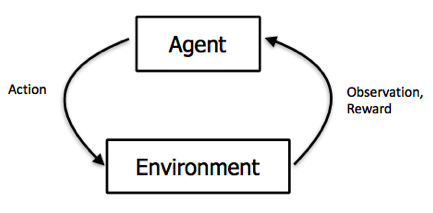

### OpenAI 짐(gym)
* https://gym.openai.com
* 다양한 종류의 시뮬레이션 환경 제공 툴킷
* 설치
    * `pip install --upgrade gym`
    * `pip install -U gym[atari]` : atari game module

In [2]:
!pip install --upgrade gym

  Stored in directory: C:\Users\dltpd\AppData\Local\pip\Cache\wheels\cf\a5\c9\87967963aa32540d543e51bcf0d0fc19c5d68b8f49598d3b98
  Stored in directory: C:\Users\dltpd\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built gym future


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install gym[atari]

  Using cached https://files.pythonhosted.org/packages/e6/37/fc5bde88462cf8a069e522dd6a0d259b69faba1326f0a3ce8b4e11d9f317/Pillow-6.0.0-cp36-cp36m-win_amd64.whl


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\python36\\Lib\\site-packages\\cv2\\cv2.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### MsPacman 시뮬레이터 로드
* `gym` 모듈 로드

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import gym
import tensorflow as tf
import numpy as np

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


* `make('env_name')` : MsPacman 버전 0 환경 로드

In [5]:
env = gym.make('MsPacman-v0')

* `reset()` 환경 초기화, 최초의 관측 반환
    * 관측의 내용은 환경 마다 상이
    * MsPacman 관측 : 게임 화면
        * `[width, height, channels]`, RGB 이미지
    

In [20]:
obs = env.reset()
print(obs)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[228 111 111]
  [228 111 111]
  [228 111 111]
  ...
  [228 111 111]
  [228 111 111]
  [228 111 111]]

 [[228 111 111]
  [228 111 111]
  [228 111 111]
  ...
  [228 111 111]
  [228 111 111]
  [228 111 111]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


* `render()` : 화면에 표시
* `render(mode='rgb_array')` : 렌더링 모드 선택, 이미지를 넘파이 배열로 반환

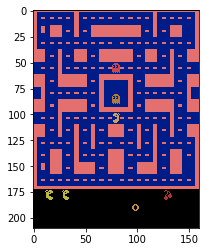

In [21]:
img = env.render(mode='rgb_array')
plt.imshow(img)

* MsPacman의 경우 관측값과 `render()`의 반환값이 같다.
    * 대부분의 경우 그렇지 않음에 주의

In [8]:
(img == obs).all()

True

#### 환경 그리기위한 유틸리티 함수

In [9]:
def plot_environment(env, figsize=(5,6)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

* `action_space` 
    * 환경에서 할 수 있는 행동 
    * 양의 정수
    * MsPacman : 9가지
        * 0: 중앙, 1:상, 2:우, 3:좌, 4:하, 5:우상, 6:좌상, 7:우하, 8:좌하

In [10]:
env.action_space

Discrete(9)

In [11]:
env.observation_space

Box(210, 160, 3)

* `ret = step(action)` 
    * 원하는 행동 선택
    * ret : obs, reward, done, info
        * obs : 행동에 따른 새로운 관측
        * reward : 마지막 스템에서 받을 수 있는 보상, + 또는 -
        * done : 게임 종료 여부
        * info : 환경에 대한 추가 정보, 딕셔너리, 학습에 이 정보 사용하면 안됨

In [12]:
obs, reward, done, info = env.step(0)

In [13]:
obs.shape

(210, 160, 3)

In [14]:
reward

0.0

In [15]:
done

False

In [16]:
info

{'ale.lives': 3}

* 좌:110, 좌하:40번 행동 

In [28]:
env.reset()
for step in range(110):
    env.step(3) #왼쪽
for step in range(40):
    env.step(8) #왼쪽아래

* 결과 보기

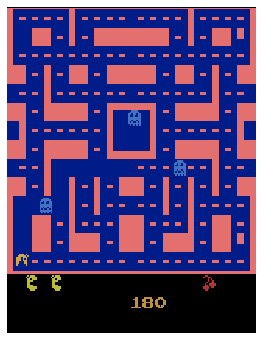

In [29]:
plot_environment(env)

#### 팩맥 랜덤 플레이 예제
* 최대 1000번의 스텝
* 10번마다  새로운 방향 선택
    *  `env.action_space.sample()`
* 게임 종료되면 멈춤

In [30]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if step %50 == 0:
        print('step:{}, action:{}, rerward:{}, info:{}, done:{}'.format(
                                        step, action, reward, info, done))
    if done:
        break


step:0, action:1, rerward:0.0, info:{'ale.lives': 3}, done:False
step:50, action:8, rerward:0.0, info:{'ale.lives': 3}, done:False
step:100, action:7, rerward:0.0, info:{'ale.lives': 3}, done:False
step:150, action:4, rerward:0.0, info:{'ale.lives': 3}, done:False
step:200, action:6, rerward:0.0, info:{'ale.lives': 2}, done:False
step:250, action:6, rerward:0.0, info:{'ale.lives': 2}, done:False
step:300, action:6, rerward:0.0, info:{'ale.lives': 2}, done:False
step:350, action:1, rerward:0.0, info:{'ale.lives': 2}, done:False
step:400, action:5, rerward:0.0, info:{'ale.lives': 2}, done:False
step:450, action:1, rerward:0.0, info:{'ale.lives': 1}, done:False
step:500, action:2, rerward:0.0, info:{'ale.lives': 1}, done:False
step:550, action:5, rerward:0.0, info:{'ale.lives': 1}, done:False
step:600, action:3, rerward:0.0, info:{'ale.lives': 1}, done:False
step:650, action:0, rerward:0.0, info:{'ale.lives': 1}, done:False
step:700, action:3, rerward:0.0, info:{'ale.lives': 1}, done:Fals

* animation을 만들기 위한 유틸리티 함수

In [31]:
import matplotlib.animation as animation
from IPython.display import HTML

def update_scene(num, frames, patch):
    plt.close()  # 이전 그래프를 닫지 않으면 두 개의 그래프가 출력되는 matplotlib의 버그로 보입니다.
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, figsize=(5,6), repeat=False, interval=40):
    fig = plt.figure(figsize=figsize)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), 
                                   frames=len(frames), repeat=repeat, interval=interval)

* ffmpeg 설치 : https://ffmpeg.zeranoe.com/builds/
    * system path 추가 필요
    * 또는
    * `plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg-20190529-02333fe-win64-static\\bin\\ffmpeg.exe'`

In [35]:
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg-20190529-02333fe-win64-static\\bin\\ffmpeg.exe'
video = plot_animation(frames)
HTML(video.to_html5_video())  # HTML5 동영상으로 만들어 줍니다

* `env.close()` : 환경 닫기, 자원 반납

In [36]:
env.close()

In [38]:
!pip install readchar

### Frozen Lake 게임(4x4)
* Game 형식 : 구멍에 빠지지 않고 목표 지점까지 도착하면 승리
    * S(Start) : 시작 지점
    * F(Frozen surface) : 안전한 얼음 표면
    * H(Hole) : 빠지는 구멍, 게임 종료
    * G(Gole) :목표 지점, 게임 승리
* action_space: 4
    * 0 : 좌, 1 : 하, 2 : 우, 3: 상
* observation_space : 16
    * 4 x 4 영역

#### 키보드로 FrozenLake 게임
* hjkl : 좌상하우

In [45]:

import gym
from gym.envs.registration import register
import gym.envs.registration

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

direction_keys = {
    'k': UP,
    'j': DOWN,
    'l': RIGHT,
    'h': LEFT}

reg_id = "FrozeLake-custom-v1" 

# Register FrozenLake with is_slippery False
try:
    register(
        id=reg_id,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery': False}
    )
except:
    pass


env = gym.make(reg_id)
ret = env.reset()
print(ret)
env.render()  # Show the initial board

while True:
    # Choose an action from keyboard
    key = input("h:Left, j:Down, k:Up, l:Right, q to quit.")
    if key not in direction_keys.keys():
        print("Game aborted!")
        break
    action = direction_keys[key]
    state, reward, done, info = env.step(action)
    env.render()  # Show the board after action
    print("state: {}, action:{}, reward:{}, info:{}".format(
                                    state, action, reward, "Info: ", info))

    if done:
        print("Finished with reward", reward)
        break
        

0

SFFF
FHFH
FFFH
HFFG
h:Left, j:Down, k:Up, l:Right, q to quit.j
  (Down)
SFFF
FHFH
FFFH
HFFG
state: 4, action:1, reward:0.0, info:Info: 
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
state: 5, action:2, reward:0.0, info:Info: 
Finished with reward 0.0


In [40]:
env.action_space.n

4

In [41]:
env.observation_space.n

16

In [42]:
env.close()

#### FrozenLake 랜덤 입력 플레이 

success step rate:4.40%(88.0/2000)


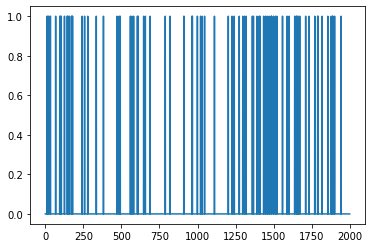

In [44]:
%matplotlib inline
# https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.pjz9g59ap

import matplotlib.pyplot as plt
import numpy as np

env = gym.make(reg_id)
env.reset()

num_episodes = 2000
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    env.reset()
    rAll = 0
    done = False

    while not done:
        # Random action
        action = np.random.randint(0, env.action_space.n - 1)

        # Get new state and reward from environment
        _state, reward, done, _info = env.step(action)
        # rAll will be 1 if success, o otherwise
        if done:
            rList.append(reward)

print("success step rate:{:.2f}%({}/{})".format(sum(rList) / num_episodes * 100, sum(rList), num_episodes))
plt.plot(rList)
plt.show()

### 마르코프 프로퍼티와 체인
* 마르코프 프로퍼티(Markov Property)
    > 미래는 현재의 과거와는 독립적이다.
    
     * $ Pr[S_{t+1} | S_t] = Pr[S_{t+1} | S_0,S_1,S_2,..., S_t] $
        * 다음의 두 확률은 같다.
        * $S_0, S_1$을 거쳐서 $S_t$에 도달한 상태의 다음 상태인 $S_{t+1}$의 확률
        * 단순히 $S_t$의 다음 상태 $S_{t+1}$의 확률

* 마르코프 체인
    * 다음 상태를 결정하기 위해 현재의 상태에만 의존

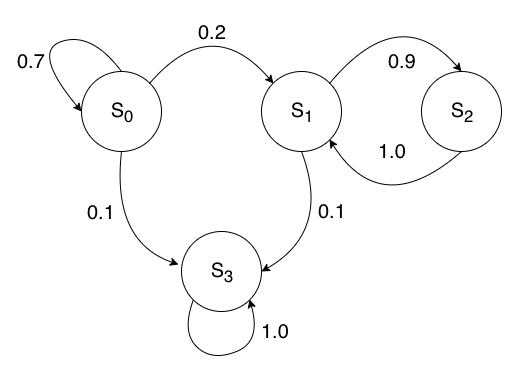
 

### 마르코프 결정 프로세스
* MDP(Markov Dicision Process)
* 1957 리차드 벨만(Richard Bellman)
    * 에이전트는 여러가지 행동 중 하나를 선택
    * 전이 확률은 선택된 행동에 따라 달라진다.
    * 상태 전이는 보상(양수 또는 음수)를 반환
    * 에이전트는 보상을 최대화하기 위한 정책을 찾는다.

### Q-Function과 Q-Learning
* Q-함수
    * 어떤 상태에서 특정 행동을 했을 때의 가치(Reward)를 나타내는 함수
    * $ reward = Q(state, action)$
* Q-Learning
    * 최적의 Q-함수를 학습하는 알고리즘
        * $\displaystyle Max Q = \operatorname*{max}_{a} Q(s, a) $
    * Optimal Policy
        * $\displaystyle \pi^*(s) = \operatorname*{argmax}_a Q(s, a)  $
    * $\displaystyle \hat Q(s, a) \xleftarrow{}  r + \operatorname*{max}_{a'} \hat Q(s', a')$

### Q-Table
* $Q(s,a)$의 모든 상태$s$에 대해서 $a$를 정리한 표
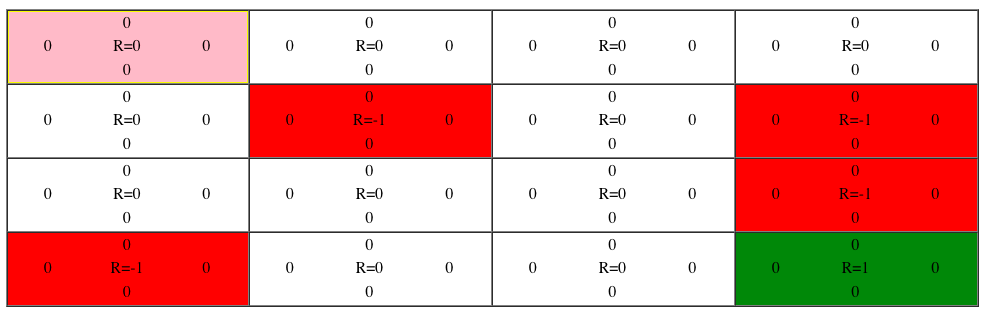

### Dummy Q-learning Algorithm
* 모든 $s,a$에 대한 테이블 항목을 $\hat Q(s,a)\xleftarrow{}0$으로 초기화
* 현재 상태 $s$를 관측
* 다음을 반복
    * 하나의 행동 $a$를 선택해서 실행
    * 즉각적으로 보상 $r$를 수령
    * 새로운 상태 $s'$ 관측
    * $\hat Q(s,a)$에 대한 테이블 항목을 다음으로 업데이트
        * $\displaystyle \hat Q(s, a) \xleftarrow{}  r + \operatorname*{max}_{a'} \hat Q(s', a')$
    * 다음 상태로 이동 $s \xleftarrow{} s'$ 
* Online DQN Test page
    * http://computingkoreanlab.com/app/jAI/jQLearning/

### Dummy Q-learning을 이용한 FrozenLake 예제

Success rate: 0.941
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


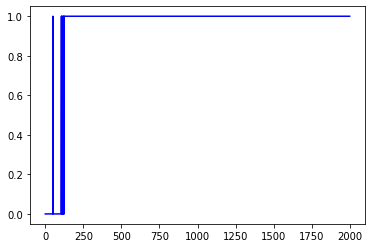

In [48]:

# https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.pjz9g59ap

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

# https://gist.github.com/stober/1943451


def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


reg_id = "FrozeLake-custom-v1" 

# Register FrozenLake with is_slippery False
try:
    register(
        id=reg_id,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery': False}
    )
except:
    pass

env = gym.make(reg_id)

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.plot(range(len(rList)), rList, color="blue")
plt.show()

### Exploit VS Exploration
* 추정 확률 기반 랜덤 선택
    * 한번 찾은 최적의 방법으로 고정되지 않게 하는 방법
    * 새로운 탐색 정책을 찾기 위한 방법
* 새로운 맛집 식당 찾기
    * 평일 : 가장 맛있는 경험을 갖는 식당 선택
    * 주말 : 랜덤하게 선택
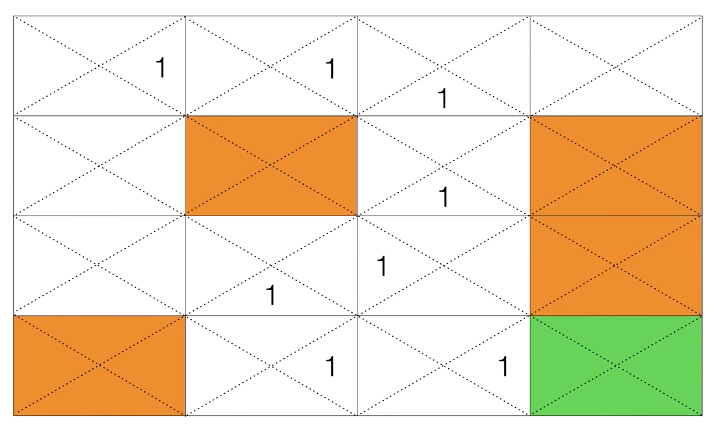

### E-greedy
*  E-greedy
    * 랜덤 수가 특정 값 보다 작은경우 랜덤수 선택
    * ```python
    e = 0.1
    if random < e: a = random
    else: a = argmax(Q(s,a))
    ```
* Decaying E-greedy
    * 시간이 흐를 수록 랜덤의 경우 수 감소
    * ```python
    for i in range(1000):
        e = 0.1/(i+1)
        if random < e : a = random
        else: a = argmax(Q(s,a))
    ```

### Add Random Noise
* Add Random Noise
    * 모든 Q-value에 노이즈 추가
    * ```python
    a = argmax(Q(s,a) + random)
    ```
* Decaying Random
    * 시간이 흐를 수록 랜덤 수의 비중 감소
    * ```python
    for i in range(1000):
        a = argmax(Q(s,a) + random / (i+1))
    ```

### 할인 계수
* Discount Factor
* reward에 할인 계수를 가중치로 계산
    * 할인 계수 $\gamma$, 1에 가까운 수(0.95 ~0.99)
* 미래의 가치는 현재의 가치보다 작다.
    * $\displaystyle \hat Q(s, a) \xleftarrow{}  r + \gamma \operatorname*{max}_{a'} \hat Q(s', a')$
    * 현재에서 먼 미래 일 수록 값이 작아 진다.
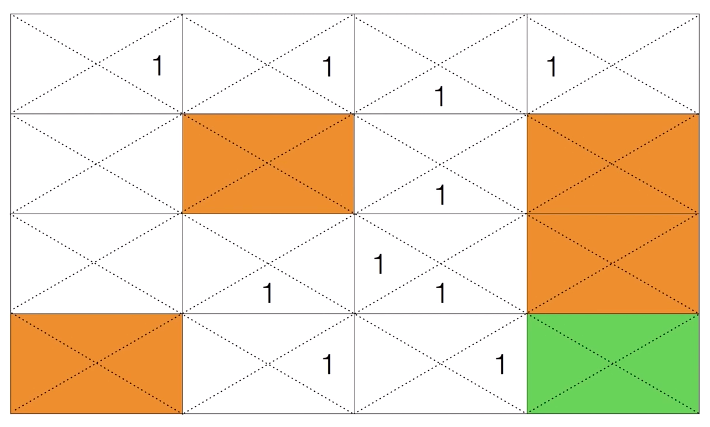

### Egreedy와 할인계수 적용 예제

Success rate: 0.802
Final Q-Table Values
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274469 0.93206535]
 [0.93206535 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


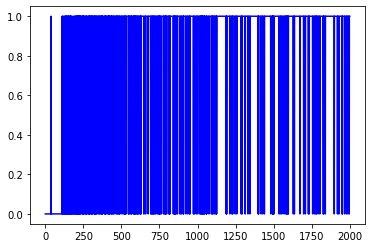

In [70]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

reg_id = "FrozeLake-custom-v1" 

# Register FrozenLake with is_slippery False
try:
    register(
        id=reg_id,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery': False}
    )
except:
    pass

env = gym.make(reg_id)

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i // 100) + 1)  # Python2&3

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e greedy
        if np.random.rand() < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)
env.close()
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.plot(range(len(rList)), rList, color="blue")
plt.show()

### Random Noise와 할인계수 적용 예제

Success rate: 0.9735
Final Q-Table Values
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


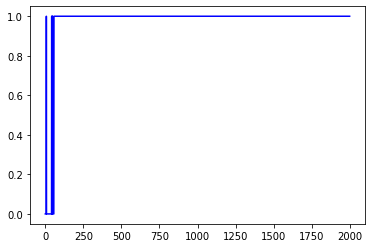

In [72]:
# https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.pjz9g59ap
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

reg_id = "FrozeLake-custom-v1" 

# Register FrozenLake with is_slippery False
try:
    register(
        id=reg_id,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery': False}
    )
except:
    pass

env = gym.make(reg_id)

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Discount factor
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1,
                                                         env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)
env.close()
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.plot(range(len(rList)), rList, color="blue")
plt.show()

### Non-deterministic FrozenLake Game
* deterministic 
    * `is_slipperty: Frue`
    * 미끄러짐 변수가 없슴
    * 항상 원하는 상태 전이 가능성 100%
* Stochastic
    *  `is_slipperty: Frue`
    * 미끄러짐 변수 존재
    * 원하는 상태 전이 불가능성 존재

### 미끄러짐이 활성화된 FronzeLake Game 예제

In [74]:
import gym

# MACROS
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

# Key mapping
direction_keys = {
    'k': UP,
    'j': DOWN,
    'l': RIGHT,
    'h': LEFT}


# is_slippery True
env = gym.make('FrozenLake-v0')

env.reset()
env.render()  # Show the initial board

while True:
    # Choose an action from keyboard
    key = input("h:Left, j:Down, k:Up, l:Right, q to quit.")
    if key not in direction_keys.keys():
        print("Game aborted!")
        break

    action = direction_keys[key]
    state, reward, done, info = env.step(action)

    # Show the board after action
    env.render()

    print("State: {} Action: {} Reward: {} Info: {}".format(
        state, action, reward, info))

    if done:
        print("Finished with reward", reward)
        break


SFFF
FHFH
FFFH
HFFG
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 0 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 0 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 0 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 0 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 1 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 1 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left, j:Down, k:Up, l:Right, q to quit.l
  (Right)
SFFF
FHFH
FFFH
HFFG
State: 2 Action: 2 Reward: 0.0 Info: {'prob': 0.3333333333333333}
h:Left

### 미끄러짐 켜진 게임의 Q-Learning 예제

Score over time: 0.028
Final Q-Table Values
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


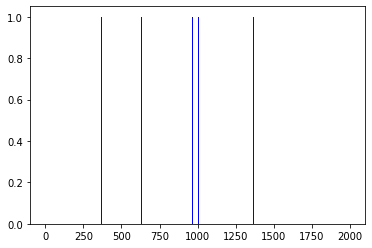

In [75]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1,
                                                         env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge 
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        state = new_state

        rAll += reward

    rList.append(rAll)
env.close()
print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

### Learing Rate
* Q 테이블의 업데이트를 Learning Rate 만큼만 반영
    * $\alpha = 0.1$
* $\displaystyle Q(s,a) \xleftarrow{} (1-\alpha)Q(s,a) + \alpha[r + \gamma \operatorname*{max}_{a'} Q(s',a')]$
* $\displaystyle Q(s,a) \xleftarrow{} Q(s,a) + \alpha[r + \gamma \operatorname*{max}_{a'} Q(s',a')-Q(s,a)]$

### Learning Rate를 적용한 미끄러짐 FrozenLake 게임 예제

Score over time: 0.4225
Final Q-Table Values
[[7.01057291e-03 5.29977077e-01 1.18235702e-02 1.50452697e-02]
 [2.22920445e-03 2.19133056e-03 1.87978743e-03 2.81624013e-01]
 [5.45996825e-03 5.54237429e-03 5.74962508e-03 1.51101137e-01]
 [2.50863032e-06 1.58476434e-03 2.29816857e-03 1.06480099e-01]
 [6.80820313e-01 2.22371726e-03 2.14444842e-03 3.65116565e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.53467310e-03 5.34762578e-14 1.81380237e-04 7.65301998e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.48661199e-04 4.32140683e-04 1.28112830e-03 3.03847213e-01]
 [1.09681139e-03 2.62016759e-01 3.72266362e-05 2.35410000e-04]
 [1.01328730e-02 3.00341270e-04 4.11980321e-04 4.44456054e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.12386147e-04 0.00000000e+00 7.74822124e-01 2.89888910e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.80909774e-01]
 [0.000000

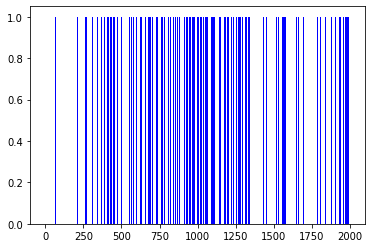

In [78]:

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
LEARNING_RATE = .85
DISCOUNT_RATE = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        noise = np.random.randn(1, env.action_space.n) / (i + 1)
        action = np.argmax(Q[state, :] + noise)

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (
            1 - LEARNING_RATE) * Q[state, action] + LEARNING_RATE * (
                reward + DISCOUNT_RATE * np.max(Q[new_state, :]))
        rAll += reward
        state = new_state

    rList.append(rAll)
env.close()
print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()



### Q-Network
* 실제 세계에는 Q-Function의 테이블이 비대해 지는 문제
* Q-Function의 Q값을 예측하는 뉴럴 네트웤
    * $cost(W) = (Ws - y)^2$
        * $y = r + \gamma maxQ(s')$
        * $Ws = \hat Q(s,a|\theta) \approx Q^*(s,a)$
    * $\displaystyle \operatorname*{min}_{\theta}\sum_{t=0}^T[\hat Q(s_t, a_t|\theta) - (r_t + \gamma \operatorname*{max}_{a'} \hat Q(s_{t+1}, a'|\theta))]^2$
* 결론 : diverges(발산, Converge 하지 않는다.)
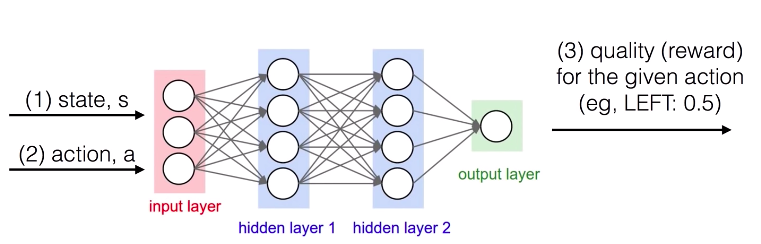

### Q-Network FrozenLake 예제
* 미흡한 결과

In [2]:

'''
This code is based on
https://github.com/hunkim/DeepRL-Agents
'''
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

# These lines establish the feed-forward part of the network used to
# choose actions
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)  # state input
W = tf.Variable(tf.random_uniform(
    [input_size, output_size], 0, 0.01))  # weight

Qpred = tf.matmul(X, W)  # Out Q prediction
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)  # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

# Set Q-learning related parameters
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList = []


def one_hot(x):
    return np.identity(16)[x:x + 1]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        local_loss = []

        # The Q-Network training
        while not done:
            # Choose an action by greedily (with e chance of random action)
            # from the Q-network
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            # Get new state and reward from environment
            s1, reward, done, _ = env.step(a)
            if done:
                # Update Q, and no Qs+1, since it's a terminal state
                Qs[0, a] = reward
            else:
                # Obtain the Q_s1 values by feeding the new state through our
                # network
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                # Update Q
                Qs[0, a] = reward + dis * np.max(Qs1)

            # Train our network using target (Y) and predicted Q (Qpred) values
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

            rAll += reward
            s = s1
        rList.append(rAll)

print("Percent of successful episodes: " +
      str(sum(rList) / num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

Percent of successful episodes: 0.4785%


<Figure size 640x480 with 1 Axes>

### 간단한 Cart-Pole 환경
* 카트위에 막대를 수직으로 세워서 넘어지지 않게 하는 게임
* 카드를 좌우로 움직여서 중심을 마춘다.
* 환경 관측 값과 action-space가 단순해서 학습에 유리
* action_space : 2가지
    * 0 : 좌
    * 1 : 우
* obs : 4개의 실수
    * {카트의 수평위치,카트의 속도, 막대의 각도(0=수직), 막대의 각속도}
* reward : 무조건 스텝마다 +1
    * 오래 살아 남는 것이 목표
* done : 게임 종료
* info : 없슴

obs: [ 0.03192727 -0.01134396 -0.01389702 -0.03241641]
action space: Discrete(2)


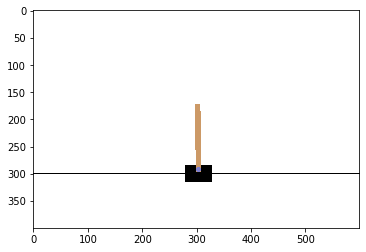

In [2]:
%matplotlib inline
import gym
import matplotlib.pylab as plt
env = gym.make("CartPole-v0")
obs = env.reset()
print("obs:", obs)
print("action space:", env.action_space)
img = env.render(mode='rgb_array')
plt.imshow(img)

###### CartPole 환경의 렌더링 문제
* `render(mode='rgb_array')`를 사용해도 새 창 출력
    * 모니터가 없는 headless 서버의 경우 오류 발생
        * Xvfb 같은 가짜 X 서버 설치
        * `$ xvfb-run -s "-screen 0 1400x900x24" jupyter notebook`
        * 또는, 자체 렌더링 함수 생성

In [4]:
!pip install pillow

  Using cached https://files.pythonhosted.org/packages/e6/37/fc5bde88462cf8a069e522dd6a0d259b69faba1326f0a3ce8b4e11d9f317/Pillow-6.0.0-cp36-cp36m-win_amd64.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # 문제없음, OpenAI 짐의 렌더링 함수를 사용합니다
except Exception:
    openai_cart_pole_rendering = False  # 가능한 X 서버가 없다면, 자체 렌더링 함수를 사용합니다

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # OpenAI 짐의 렌더링 함수를 사용합니다
        return env.render(mode="rgb_array")
    else:
        # Cart-Pole 환경을 위한 렌더링 (OpenAI 짐이 처리할 수 없는 경우)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # 파랑 초록 빨강
        pole_col = 0x669acc # 파랑 초록 빨강

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 하드코딩 정책
* 막대의 기울어짐 각도의 반대로 카트를 이동하게 하드 코딩

In [6]:
stop_when_over = False
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
max_right = env.observation_space.high[0]
max_left = env.observation_space.low[0]
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    if done and stop_when_over:
        break
    elif max_right < position or max_left > position:
            break

c:\python36\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
import matplotlib.animation as animation
from IPython.display import HTML

def update_scene(num, frames, patch):
    plt.close()  # 이전 그래프를 닫지 않으면 두 개의 그래프가 출력되는 matplotlib의 버그로 보입니다.
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, figsize=(5,6), repeat=False, interval=40):
    fig = plt.figure(figsize=figsize)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), 
                                   frames=len(frames), repeat=repeat, interval=interval)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg-20190529-02333fe-win64-static\\bin\\ffmpeg.exe'
video = plot_animation(frames, figsize=(6,4))
HTML(video.to_html5_video())  #

### Q-Network CartPole 예제

In [1]:
'''
This code is based on
https://github.com/hunkim/DeepRL-Agents
'''
import numpy as np
import tensorflow as tf
from collections import deque

import gym
env = gym.make('CartPole-v0')

# Constants defining our neural network
learning_rate = 1e-1
input_size = env.observation_space.shape[0]
output_size = env.action_space.n

X = tf.placeholder(tf.float32, [None, input_size], name="input_x")

# First layer of weights
W1 = tf.get_variable("W1", shape=[input_size, output_size],
                     initializer=tf.contrib.layers.xavier_initializer())
Qpred = tf.matmul(X, W1)

# We need to define the parts of the network needed for learning a policy
Y = tf.placeholder(shape=[None, output_size], dtype=tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(Y - Qpred))
# Learning
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Values for q learning
max_episodes = 5000
dis = 0.9
step_history = []


# Setting up our environment
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for episode in range(max_episodes):
    e = 1. / ((episode / 10) + 1)
    step_count = 0
    state = env.reset()
    done = False

    # The Q-Network training
    while not done:
        step_count += 1
        x = np.reshape(state, [1, input_size])
        # Choose an action by greedily (with e chance of random action) from
        # the Q-network
        Q = sess.run(Qpred, feed_dict={X: x})
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q)

        # Get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        if done:
            Q[0, action] = -100
        else:
            x_next = np.reshape(next_state, [1, input_size])
            # Obtain the Q' values by feeding the new state through our network
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

        # Train our network using target and predicted Q values on each episode
        sess.run(train, feed_dict={X: x, Y: Q})
        state = next_state

    step_history.append(step_count)
    if episode % 100 == 0:
        print("Episode: {}  steps: {}".format(episode, step_count))
    # If last 10's avg steps are 500, it's good enough
    if len(step_history) > 10 and np.mean(step_history[-10:]) > 500:
        break

# See our trained network in action
observation = env.reset()
reward_sum = 0
while True:
    env.render()

    x = np.reshape(observation, [1, input_size])
    Q = sess.run(Qpred, feed_dict={X: x})
    action = np.argmax(Q)

    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    if done:
        print("Total score: {}".format(reward_sum))
        break


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Episode: 0  steps: 27
Episode: 100  steps: 21
Episode: 200  steps: 23
Episode: 300  steps: 41
Episode: 400  steps: 15
Episode: 500  steps: 15
Episode: 600  steps: 17
Episode: 700  steps: 43
Episode: 800  steps: 39
Episode: 900  steps: 30
Episode: 1000  steps: 26
Episode: 1100  steps: 8
Episode: 1200  steps: 24
Episode: 1300  steps: 10
Episode: 1400  steps: 15
Episode: 1500  steps: 32
Episode: 1600  steps: 31
Episode: 1700  steps: 28
Episode: 1800  steps: 28
Episode: 1900  steps: 9
Episode: 2000  steps: 30
Episode: 2100  steps: 49
Episode: 2200  steps: 11
Episode: 2300  steps: 19
Episode: 2400  steps: 24
Episode: 2500  steps: 25
Episode: 2600  steps: 31
Episode: 2700  steps: 24
Episod

### DQN
* 구글의 딥마인드에서 개발
* Q-Nets의 문제 해결
    * 샘플간의 상관관계
    * 고정되지 않는 타겟
        * 학습한 만큼 타겟도 변경된다.
* Go Deep
* Experience Replay
    * 즉각적으로 학습하지 말고 버퍼에 저장
    * 버퍼에서 랜덤하게 가져와서 학습
* Separae target network
    * 예측 네트웍과 타켓 네트웍을 분리
    * 예측 네트워크만 업데이트
    * 일정 시간 이후 두 네트웍 복제

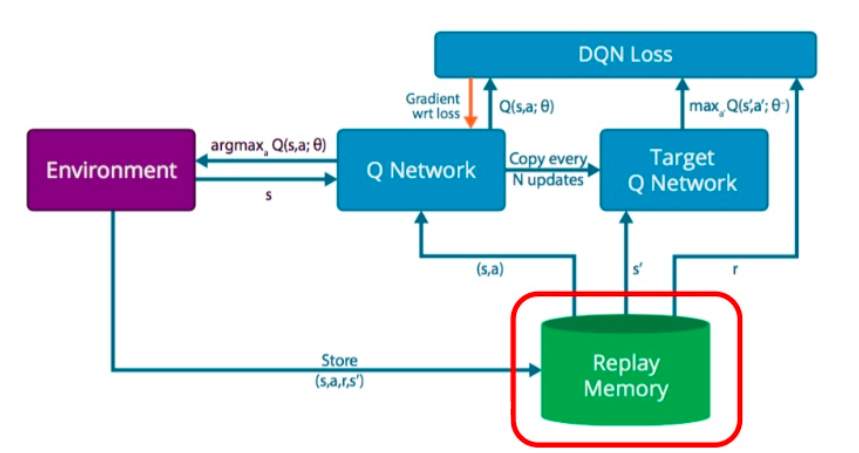
[그림출처:https://www.slideshare.net/ssuser07aa33/introduction-to-prioritized-experience-replay]

#### DQN Class

In [1]:
"""DQN Class

DQN(NIPS-2013)
"Playing Atari with Deep Reinforcement Learning"
https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf

DQN(Nature-2015)
"Human-level control through deep reinforcement learning"
http://web.stanford.edu/class/psych209/Readings/MnihEtAlHassibis15NatureControlDeepRL.pdf
"""
import numpy as np
import tensorflow as tf


class DQN:

    def __init__(self, session: tf.Session, input_size: int, output_size: int, name: str="main") -> None:
        """DQN Agent can

        1) Build network
        2) Predict Q_value given state
        3) Train parameters

        Args:
            session (tf.Session): Tensorflow session
            input_size (int): Input dimension
            output_size (int): Number of discrete actions
            name (str, optional): TF Graph will be built under this name scope
        """
        self.session = session
        self.input_size = input_size
        self.output_size = output_size
        self.net_name = name

        self._build_network()

    def _build_network(self, h_size=16, l_rate=0.001) -> None:
        """DQN Network architecture (simple MLP)

        Args:
            h_size (int, optional): Hidden layer dimension
            l_rate (float, optional): Learning rate
        """
        with tf.variable_scope(self.net_name):
            self._X = tf.placeholder(tf.float32, [None, self.input_size], name="input_x")
            net = self._X

            net = tf.layers.dense(net, h_size, activation=tf.nn.relu)
            net = tf.layers.dense(net, self.output_size)
            self._Qpred = net

            self._Y = tf.placeholder(tf.float32, shape=[None, self.output_size])
            self._loss = tf.losses.mean_squared_error(self._Y, self._Qpred)

            optimizer = tf.train.AdamOptimizer(learning_rate=l_rate)
            self._train = optimizer.minimize(self._loss)

    def predict(self, state: np.ndarray) -> np.ndarray:
        """Returns Q(s, a)

        Args:
            state (np.ndarray): State array, shape (n, input_dim)

        Returns:
            np.ndarray: Q value array, shape (n, output_dim)
        """
        x = np.reshape(state, [-1, self.input_size])
        return self.session.run(self._Qpred, feed_dict={self._X: x})

    def update(self, x_stack: np.ndarray, y_stack: np.ndarray) -> list:
        """Performs updates on given X and y and returns a result

        Args:
            x_stack (np.ndarray): State array, shape (n, input_dim)
            y_stack (np.ndarray): Target Q array, shape (n, output_dim)

        Returns:
            list: First element is loss, second element is a result from train step
        """
        feed = {
            self._X: x_stack,
            self._Y: y_stack
        }
        return self.session.run([self._loss, self._train], feed)

#### DQN을 이용한 CartPole 예제
* 2015 Nature 논문

In [ ]:
"""
Double DQN (Nature 2015)
http://web.stanford.edu/class/psych209/Readings/MnihEtAlHassibis15NatureControlDeepRL.pdf

Notes:
    The difference is that now there are two DQNs (DQN & Target DQN)

    y_i = r_i + 𝛾 * max(Q(next_state, action; 𝜃_target))

    Loss: (y_i - Q(state, action; 𝜃))^2

    Every C step, 𝜃_target <- 𝜃

"""
import numpy as np
import tensorflow as tf
import random
from collections import deque
import dqn

import gym
from typing import List

env = gym.make('CartPole-v0')
env = gym.wrappers.Monitor(env, directory="gym-results/", force=True)

# Constants defining our neural network
INPUT_SIZE = env.observation_space.shape[0]
OUTPUT_SIZE = env.action_space.n

DISCOUNT_RATE = 0.99
REPLAY_MEMORY = 50000
BATCH_SIZE = 64
TARGET_UPDATE_FREQUENCY = 5
MAX_EPISODES = 5000


def replay_train(mainDQN: dqn.DQN, targetDQN: dqn.DQN, train_batch: list) -> float:
    """Trains `mainDQN` with target Q values given by `targetDQN`

    Args:
        mainDQN (dqn.DQN): Main DQN that will be trained
        targetDQN (dqn.DQN): Target DQN that will predict Q_target
        train_batch (list): Minibatch of replay memory
            Each element is (s, a, r, s', done)
            [(state, action, reward, next_state, done), ...]

    Returns:
        float: After updating `mainDQN`, it returns a `loss`
    """
    states = np.vstack([x[0] for x in train_batch])
    actions = np.array([x[1] for x in train_batch])
    rewards = np.array([x[2] for x in train_batch])
    next_states = np.vstack([x[3] for x in train_batch])
    done = np.array([x[4] for x in train_batch])

    X = states

    Q_target = rewards + DISCOUNT_RATE * np.max(targetDQN.predict(next_states), axis=1) * ~done

    y = mainDQN.predict(states)
    y[np.arange(len(X)), actions] = Q_target

    # Train our network using target and predicted Q values on each episode
    return mainDQN.update(X, y)


def get_copy_var_ops(*, dest_scope_name: str, src_scope_name: str) -> List[tf.Operation]:
    """Creates TF operations that copy weights from `src_scope` to `dest_scope`

    Args:
        dest_scope_name (str): Destination weights (copy to)
        src_scope_name (str): Source weight (copy from)

    Returns:
        List[tf.Operation]: Update operations are created and returned
    """
    # Copy variables src_scope to dest_scope
    op_holder = []

    src_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=src_scope_name)
    dest_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=dest_scope_name)

    for src_var, dest_var in zip(src_vars, dest_vars):
        op_holder.append(dest_var.assign(src_var.value()))

    return op_holder


def bot_play(mainDQN: dqn.DQN, env: gym.Env) -> None:
    """Test runs with rendering and prints the total score

    Args:
        mainDQN (dqn.DQN): DQN agent to run a test
        env (gym.Env): Gym Environment
    """
    state = env.reset()
    reward_sum = 0

    while True:

        env.render()
        action = np.argmax(mainDQN.predict(state))
        state, reward, done, _ = env.step(action)
        reward_sum += reward

        if done:
            print("Total score: {}".format(reward_sum))
            break


def main():
    # store the previous observations in replay memory
    replay_buffer = deque(maxlen=REPLAY_MEMORY)

    last_100_game_reward = deque(maxlen=100)

    with tf.Session() as sess:
        mainDQN = dqn.DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="main")
        targetDQN = dqn.DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="target")
        sess.run(tf.global_variables_initializer())

        # initial copy q_net -> target_net
        copy_ops = get_copy_var_ops(dest_scope_name="target",
                                    src_scope_name="main")
        sess.run(copy_ops)

        for episode in range(MAX_EPISODES):
            e = 1. / ((episode / 10) + 1)
            done = False
            step_count = 0
            state = env.reset()

            while not done:
                if np.random.rand() < e:
                    action = env.action_space.sample()
                else:
                    # Choose an action by greedily from the Q-network
                    action = np.argmax(mainDQN.predict(state))

                # Get new state and reward from environment
                next_state, reward, done, _ = env.step(action)

                if done:  # Penalty
                    reward = -1

                # Save the experience to our buffer
                replay_buffer.append((state, action, reward, next_state, done))

                if len(replay_buffer) > BATCH_SIZE:
                    minibatch = random.sample(replay_buffer, BATCH_SIZE)
                    loss, _ = replay_train(mainDQN, targetDQN, minibatch)

                if step_count % TARGET_UPDATE_FREQUENCY == 0:
                    sess.run(copy_ops)

                state = next_state
                step_count += 1
            if episode %50 == 0 :
                print("Episode: {}  steps: {}".format(episode, step_count))

            # CartPole-v0 Game Clear Checking Logic
            last_100_game_reward.append(step_count)

            if len(last_100_game_reward) == last_100_game_reward.maxlen:
                avg_reward = np.mean(last_100_game_reward)

                if avg_reward > 199:
                    print(f"Game Cleared in {episode} episodes with avg reward {avg_reward}")
                    break


if __name__ == "__main__":
    main()